In [1]:
import numpy as np
import math
import scipy.optimize as optimize
import matplotlib.pyplot as plt

## generate pools

for one pool(100 pools) with ns(5000) species, all species are not anomolous species. (consider add anomolous species) 
number of resources: nr ( nr = 1,2,...,7)

we need generate the growth rate $g_{\mu i}$. $\sum_i g_{\mu i}^2=1 \mathrm{hr}^{-2}$

In [2]:
def generate_anomolous_species(ns, nr):
    vector = []
    for _ in range(ns):
        vector = np.random.uniform(0,1,size=nr)
        vector /= np.linalg.norm(vector)
        vectors.append(vector)
    return vectors

In [3]:
def generate_anomolous_nutrient_rank(ns, nr):
    vectors = []
    for _ in range(ns):
        vector = random.sample(range(nr), nr)
        vectors.append(vector)
    return vectors

In [4]:
def generate_random_vectors(ns, nr):
    vectors = []
    ranks = []

    for _ in range(ns):
        vector = np.random.uniform(0,1,size=nr)
        vector /= np.linalg.norm(vector)
        vectors.append(vector)

        # Generate ranks
        rank = np.argsort(-vector)
        ranks.append(rank)

    return vectors, ranks

##the rank should be used like maxrate-vectors[rank[0]], secondrate-vectors[rank[1]]...

In [5]:
# generate_anomolous growth rate & rank
'''
spciesGR = []
rank = []
for i in range(ns):
    spciesGR.append(generate_anomolous_species(ns, nr))
    rank.append(generate_anomolous_nutrient_rank(ns, nr))
'''

'\nspciesGR = []\nrank = []\nfor i in range(ns):\n    spciesGR.append(generate_anomolous_species(ns, nr))\n    rank.append(generate_anomolous_nutrient_rank(ns, nr))\n'

In [6]:
def delta_n(n0,gr,t):
    # n0,gr,t are all numbers
    try:
        delta_n = n0 * math.exp(gr * t) - n0
        #if t<0.000001:
           # print("gr = %s"%(gr))
           # print("t = %s"%(t))
           # print("math.exp(gr * t) = %s"%(math.exp(gr * t)))
            #print("n0 = %s"%(n0))
            #print("delta_n = %s"%(delta_n))
        return delta_n
    except OverflowError:
        print("OverflowError: Input value is too large for exponential calculation.")
        print(gr)
        print(t)
        return None

In [7]:
def delta_c(n0,gr,boolgr,delta_t,nri ,ns):
    # gr is a matrix for growth rate 
    # nri is the index of resource from 0 to nr-1
    #boolgr is a vector to determine whether the bug is consuming the resource 
    ###### we need to figure how to generate boolgr
    deltaC = 0
    for i in range(ns):
        deltaC = deltaC + boolgr[i]*delta_n(n0[i],gr[i][nri],delta_t)
        #print(gr[i][nri])
    return deltaC

In [8]:
#####
def find_root(f, low, high, precision):
    while high - low > precision:
        mid = (low + high) / 2.0
        if f(mid) < 0:
            low = mid
        else:
            high = mid
    return (low + high) / 2.0

### scipy.optimize.root

In [9]:
def runouttime(nri, boolgr, n0, s, gr):  
    #calculate the runout time for the (nri+1)th neutrient
    #n0(vec),s(number) remaining bug & neutrient concentration
    #import scipy.optimize as optimize
    if s < 0.000000000001:
        solution = 0 
    elif max(boolgr)==0:
        solution = np.nan
    else:
        def equation(t):
            deltaC = sum(boolgr[i] * delta_n(n0[i], gr[i][nri], t) for i in range(len(n0)))
            return deltaC - s
        #solution = optimize.fsolve(equation, 1.0)
        solution = find_root(equation, 0, 100, 0.000000000001)
        '''
    if solution > 10:
        print("consumption is:")
        print(sum(boolgr[i] * delta_n(n0[i], gr[i][nri], solution) for i in range(len(n0))))
        print("resource left is %s" %(s))
    summ = sum(boolgr[i] * delta_n(n0[i], gr[i][nri], solution) for i in range(len(n0)))
    if summ > 2:
        print("__________________________")
        print("consumption is %s"%(summ))
        print("deltat is %s"%(solution))
        #for i in range(len(n0)):
            #if boolgr[i]==1:
                #print(delta_n(n0[i], gr[i][nri], solution))
    '''
    return solution

### get_boolgr for diauxie

In [119]:
def get_boolgr(rank, nsi, c0,n0):
    boolgr = np.zeros(len(n0))
    # spic_resource[i] = k the i+1_th resource is used by the k+1_th species
    for i in range(nr):
        if c0[rank[nsi][i]] > 0.000000000001:
            boolgr[rank[nsi][i]]=1
            break

    if n0[nsi] < 0.000000000001:
        boolgr = np.zeros(len(n0))

    return boolgr

In [120]:
def sigma(s):
    # Compute the squared differences
    squared_diff = [(si - 1/3)**2 for si in s]
    # Calculate the average of squared differences
    average_squared_diff = np.mean(squared_diff)
    # Calculate the standard deviation
    sigma_RS = np.sqrt(average_squared_diff)
    return sigma_RS

In [121]:
def PseudoUniformSupply(size = 3, k = 0):
    vector = np.random.uniform(k+0, k+10, size)
    vector /= sum(vector)
    return vector, sigma(vector)

In [122]:
def normalize_vector(v):
    sum_of_components = np.sum(v)
    if sum_of_components == 0:
        return v
    elif sum_of_components>1000000000:
        max_value = np.max(v)
        max_index = np.argmax(v)
        #print(max_value)
        #print(max_index)
        v = np.zeros(len(v))
        v[max_index] = 1
        return v
    else:
        return v / sum_of_components

In [123]:
v = np.array([368.3750, 25.6786, 0.4801, 1.4662])
print(normalize_vector(v))

[0.93024013 0.06484497 0.00121237 0.00370253]


In [124]:
###test get_boolgr
'''
nr=4
ns=4
rank = np.array([[4, 2, 1, 3],
       [1, 2, 4, 3],
       [3, 2, 4, 1],
       [4, 1, 3, 2]])

rank = rank - 1
#rank = rank.transpose()
print(rank)
c0 = np.array([2.03166546, 1.76250143, 0.0492092 , 0.11662391])
n0 = [0.01,0.01,0.01,0.01]

#res_used_by = {}

#for i in range(0, nr):
#    res_used_by[i] = []  
hhh = []
for nri in range(ns):
    #spic_resource = []
    boolgr = get_boolgr(rank, nri, c0,n0)
    hhh.append(boolgr)
print(np.array(hhh).transpose())
'''

'\nnr=4\nns=4\nrank = np.array([[4, 2, 1, 3],\n       [1, 2, 4, 3],\n       [3, 2, 4, 1],\n       [4, 1, 3, 2]])\n\nrank = rank - 1\n#rank = rank.transpose()\nprint(rank)\nc0 = np.array([2.03166546, 1.76250143, 0.0492092 , 0.11662391])\nn0 = [0.01,0.01,0.01,0.01]\n\n#res_used_by = {}\n\n#for i in range(0, nr):\n#    res_used_by[i] = []  \nhhh = []\nfor nri in range(ns):\n    #spic_resource = []\n    boolgr = get_boolgr(rank, nri, c0,n0)\n    hhh.append(boolgr)\nprint(np.array(hhh).transpose())\n'

In [125]:
#print(boolgr.transpose())

In [138]:
def onecycle(n0new, c0new,spciesGR,round1):
    printround = 270
    ### calculate the dynamic within one cycle
    # n0 vector length ns
    # c0 vector length nr
    Nnich = 0
    n0 = [n0new]
    c0 = [c0new]
    time_node = [0] ## time_node start from 0

    while True:
        boolgr = []
        res_used_by = {}
        for i in range(0, nr):
            res_used_by[i] = [] 
        for i in range(ns):
            boolgr_temp = get_boolgr(rank, i, c0[Nnich],n0[Nnich])
            boolgr.append(boolgr_temp)
        boolgr = np.array(boolgr).transpose() 
        #print(boolgr)
        runoutT = [runouttime(i, boolgr[i], n0[Nnich],c0[Nnich][i],spciesGR) for i in range(nr)]
        if round1 == printround:
            print("t:")
            print(runoutT)
        try:
            deltaT, runout_index = min((val, idx) for (idx, val) in enumerate(runoutT) if val > 0.000000000001)
            #deltaT, runout_index = min((val, idx) for (idx, val) in enumerate(runoutT))
        except ValueError:
            break
        if round1 == printround:
            print("deltaT:")
            print(deltaT)
        time_node.append(float(deltaT+time_node[Nnich]))

        next_n0 = [n0[Nnich][i] + sum(delta_n(n0[Nnich][i],spciesGR[i][j],deltaT)*boolgr[j][i] for j in range(nr)) for i in range(ns)]
        '''
        for i in range(ns):
            summ = sum(delta_n(n0[Nnich][i],spciesGR[i][j],deltaT)*boolgr[j][i] for j in range(nr))
            if summ > 2:
                for j in range(nr):
                    if boolgr[j][i] == 1:
                        print("n0[Nnich][i] is %s"%(n0[Nnich][i]))
                        print("deltaT is %s"%(deltaT))
                        print("spciesGR[i][j] is %s"%(spciesGR[i][j]))
                        print("delta_n is %s" %(delta_n(n0[Nnich][i],spciesGR[i][j],deltaT)))
           '''             
                        
        n0.append(next_n0) 
    
        next_c0 = [(c0[Nnich][j]-delta_c(n0[Nnich],spciesGR,boolgr[j],deltaT,j,ns))for j in range(nr)]
        c0.append(next_c0) 
        #print(next_c0)
        #print(c0[Nnich+1])
        if round1 == printround:
            print("@@@@@@@@@@@@@@@@@@@@@@")
            print("n0:")
            print(n0)
            print(boolgr)
            print("c0:")
            print(next_c0)
            print("@@@@@@@@@@@@@@@@@@@@@@")
        if all(element < 0.000000000001 for element in c0[Nnich+1]):
            break

        Nnich += 1
    if round1 == printround:
        plt.plot(time_node, n0)
    #print("______________")
    #print(time_node)

    #print(Nnich)
    #print(time_node[-1])
    return n0, c0, time_node

### read pickle file

In [139]:
import pickle

# Open the .pkl file in binary mode for reading
with open('3N4R_success_comm.pkl', 'rb') as file:
    # Load the object from the file
    data = pickle.load(file)

t:
[1.3956890083054674, nan, nan, 1.6418307210106065]
deltaT:
1.3956890083054674
@@@@@@@@@@@@@@@@@@@@@@
n0:
[[0.02589386544171173, 0.7988978480906695, 0, 0.0005487466442651073], [0.10994685591161638, 2.8305633080906403, 0.0, 0.0010539295246008618]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
c0:
[2.930988785010413e-14, 1.76250143, 0.0492092, 0.032065736649759605]
@@@@@@@@@@@@@@@@@@@@@@
t:
[0, 0.3285957325015687, nan, 0.24614171270549434]
deltaT:
0.24614171270549434
@@@@@@@@@@@@@@@@@@@@@@
n0:
[[0.02589386544171173, 0.7988978480906695, 0, 0.0005487466442651073], [0.10994685591161638, 2.8305633080906403, 0.0, 0.0010539295246008618], [0.14188402905760683, 4.067709729271092, 0.0, 0.0011824930283901112]]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
c0:
[2.930988785010413e-14, 0.525355008819548, 0.0492092, -2.010197563961924e-14]
@@@@@@@@@@@@@@@@@@@@@@
t:
[0, 0.08106024024208125, 4.101956702053755, 0]
deltaT:
0.08106024024208125
@@@@@@@@@@@@@@@@@@@@@@
n0:
[[0.

/var/folders/cd/5hbmg50x21dcv5w59_3cwdrm0000gn/T/ipykernel_37932/1643784605.py:4: RuntimeWarning: overflow encountered in double_scalars
  delta_n = n0 * math.exp(gr * t) - n0
/var/folders/cd/5hbmg50x21dcv5w59_3cwdrm0000gn/T/ipykernel_37932/2556694938.py:11: RuntimeWarning: invalid value encountered in double_scalars
  deltaC = sum(boolgr[i] * delta_n(n0[i], gr[i][nri], t) for i in range(len(n0)))


'\nsurvNum = 1\n\nif realcyc > cycleNum - 2:\n    for i in range(ns):\n        if populRelative[i][-1] > 0.000000000001:\n            survNum = survNum + 1\nelse:\n    survNum = 1\nstat[int(survNum)] = stat[int(survNum)]+1\n#print("surive num of the %s th trial is %f" %(Ntr,survNum))\n\n#print(stat)\nif survNum == 0:\n\n    linear_space = np.linspace(1,realcyc ,realcyc)\n\n    for x in range(ns):\n            #if x not in extinct_spicies:\n            plt.plot(linear_space, populAbs[x])\n\n    #plt.plot(linear_space, popul[1])\n\n\n    plt.ylim(0, 8)  # set the ylim to be -2 to 2\n    plt.show()\n\n    #break\n'

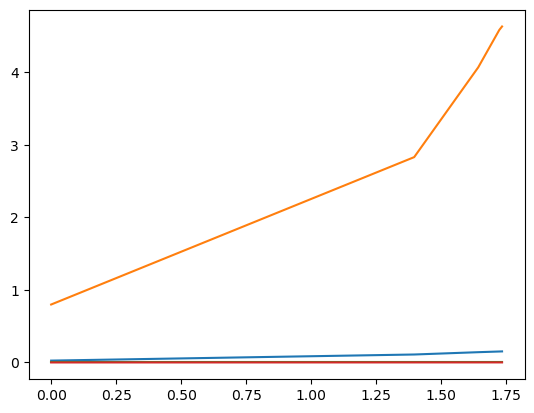

In [140]:
##set up dilution factor 
DF = 100

nr = 4
ns = 4

lendata = 9670
#Ntr = 32

stat = np.zeros(ns+1)

start = 5000 
#for Ntr in range(start, lendata):

#set up initial population
n0 = [[]]
for i in range(ns):
    n0[0].append(0.01)
    #n0[0].append(1/ns/(DF-1))
#n0.append(0.01*np.ones(4))
    
##set up sources suppliment
c0 = []
#for i in range(nr):
    #c0[0].append(1/nr)
    
c0.append([2.03166546, 1.76250143, 0.0492092 , 0.11662391])   
#s = 1/ns
#print(c0)
extinct_spicies = set()

time_node = [0]

#record Population fractions at the end of each growth cycle

populationEndRelative = []
populationEndAbs = []

# generate_unanomolous growth rate & rank
#spciesGR, rank = generate_random_vectors(ns, nr)
#spciesGR = data[Ntr]["g"]
#rank = data[Ntr]["pref_list"]

spciesGR = np.array([[1.4315281 , 0.79309012, 0.77410802, 1.036041  ],
       [0.90636089, 1.47315291, 0.97959902, 0.47060371],
       [1.02316842, 1.12677489, 0.69212893, 1.04252936],
       [1.26681676, 0.70934528, 0.91473452, 0.46761421]])


rank = np.array([[4, 2, 1, 3],
       [1, 2, 4, 3],
       [3, 2, 4, 1],
       [4, 1, 3, 2]])

rank = rank - 1

#generate the first cycle
ntrial, ctrial, timenodetrial = onecycle(n0[0],c0[0],spciesGR,1)

populationEndAbs.append(ntrial[-1])

log_N = normalize_vector(ntrial[-1])
#print(log_N)
populationEndRelative.append(log_N)

#generate other cycle
cycleNum = 500

realcyc = 1

for k in range(cycleNum):
    n0temp = []
    for i in range(len(ntrial[-1])):
        if ntrial[-1][i]<0.000000000001:
            n0temp.append(0)
        else:
            n0temp.append(ntrial[-1][i]/ DF)
    n0[0] = n0temp
    #print(n0[0])
    #c0[0] , avg = PseudoUniformSupply(nr)
    # visualize

    ntrial, ctrial, timenodetrial = onecycle(n0[0],c0[0],spciesGR,k)

    #print(ntrial[-1])
    if max(ntrial[-1])<0.000000000001:
        populationEndRelative.append(ntrial[-1])
        break
    log_N = normalize_vector(ntrial[-1])

    realcyc = realcyc + 1
    populationEndAbs.append(ntrial[-1])
    populationEndRelative.append(log_N)


### check survive
populRelative = np.transpose(populationEndRelative)
populAbs = np.transpose(populationEndAbs)

'''
survNum = 1

if realcyc > cycleNum - 2:
    for i in range(ns):
        if populRelative[i][-1] > 0.000000000001:
            survNum = survNum + 1
else:
    survNum = 1
stat[int(survNum)] = stat[int(survNum)]+1
#print("surive num of the %s th trial is %f" %(Ntr,survNum))

#print(stat)
if survNum == 0:

    linear_space = np.linspace(1,realcyc ,realcyc)

    for x in range(ns):
            #if x not in extinct_spicies:
            plt.plot(linear_space, populAbs[x])

    #plt.plot(linear_space, popul[1])


    plt.ylim(0, 8)  # set the ylim to be -2 to 2
    plt.show()

    #break
'''

In [141]:
print(stat)

[0. 0. 0. 0. 0.]


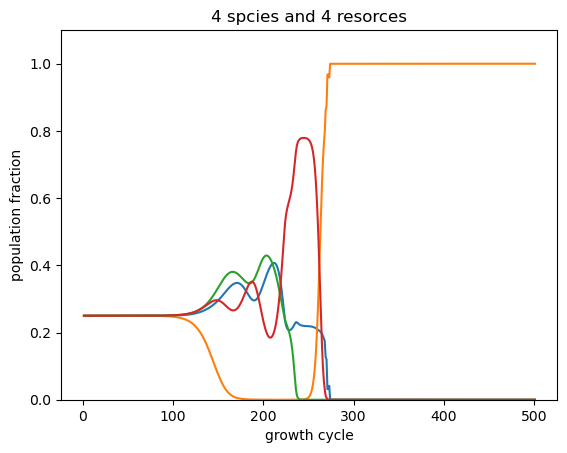

In [142]:
linear_space = np.linspace(1,realcyc ,realcyc)


for x in range(ns):
        #if x not in extinct_spicies:
    plt.plot(linear_space, populRelative[x])
     
#plt.plot(linear_space, popul[1])

plt.title("4 spcies and 4 resorces")
plt.xlabel("growth cycle")
plt.ylabel("population fraction")

plt.ylim(0, 1.1)  # set the ylim to be -2 to 2
plt.show()

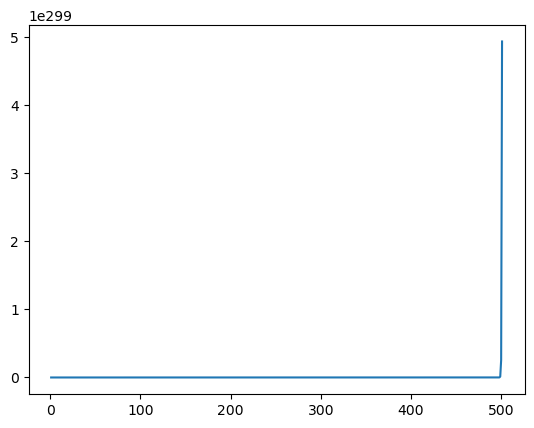

In [137]:
linear_space = np.linspace(1,realcyc ,realcyc)

for x in range(ns):
        #if x not in extinct_spicies:
    plt.plot(linear_space, populAbs[x])
#plt.plot(linear_space, populAbs[1])
#plt.plot(linear_space, popul[1])


#plt.ylim(0, 1.5)  # set the ylim to be -2 to 2
plt.show()

In [110]:
print(populAbs[1][273])

1185008.4231378504


In [24]:
A = np.array([   0,  528, 3572,  900])
B = np.array([   0,  509, 3339,  822])
c = A+B
print(c)

[   0 1037 6911 1722]


In [25]:
print(0.01*np.ones(4))

[0.01 0.01 0.01 0.01]


In [26]:
print(1722/9670)

0.178076525336091


In [27]:
print(0.000000000001)

1e-12


In [28]:
[   0.  528. 3572.  900.]

SyntaxError: invalid syntax (1766852389.py, line 1)